In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os, sys
import time
import torch

In [3]:
sys.path.append("../")
from randman.numpy_randman import NumpyRandman
from randman.torch_randman import TorchRandman
from randman.jax_randman import JaxRandman
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"  # Prevent jax from booking 90% of the GPU memory

In [4]:
res = []
for nb_samp in [1e2, 1e3, 1e4, 1e5, 1e6]:
    nb_samp = int(nb_samp)
    print(nb_samp)
    
    rm = NumpyRandman(1000,10)
    t0 = time.time()
    x,y = rm.get_random_manifold_samples(nb_samp)
    r_numpy = time.time()-t0
    print("NumPy: %fs"%(r_numpy))
    
    rm = TorchRandman(1000,10)
    t0 = time.time()
    x,y = rm.get_random_manifold_samples(nb_samp)
    r_torch = time.time()-t0
    print("Torch: %fs"%(r_torch))

    device=torch.device("cuda:0")
    rm = TorchRandman(1000,10,device=device)
    t0 = time.time()
    x,y = rm.get_random_manifold_samples(nb_samp)
    r_gpu = time.time()-t0
    print("GPU: %fs"%(r_gpu))
    
    rm = JaxRandman(1000,10)
    t0 = time.time()
    x,y = rm.get_random_manifold_samples(nb_samp)
    r_jax = time.time()-t0
    print("Jax: %fs"%(r_jax))
    
    res.append((nb_samp, r_numpy, r_torch, r_gpu, r_jax))

100
NumPy: 1.811322s
Torch: 10.726286s
GPU: 17.428336s
Jax: 0.940394s
1000
NumPy: 2.720139s
Torch: 11.020714s
GPU: 17.891399s
Jax: 0.499519s
10000
NumPy: 10.987607s
Torch: 15.895616s
GPU: 17.819264s
Jax: 0.518774s
100000
NumPy: 163.733948s
Torch: 88.686370s
GPU: 17.857949s
Jax: 1.470295s
1000000
NumPy: 2732.631459s
Torch: 296.227679s
GPU: 87.928102s
Jax: 30.020437s


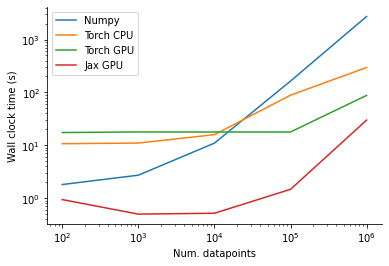

In [5]:
dat=np.array(res)
plt.plot(dat[:,0],dat[:,1:])
plt.legend(labels=["Numpy", "Torch CPU", "Torch GPU", "Jax GPU"])
plt.xlabel("Num. datapoints")
plt.ylabel("Wall clock time (s)")
plt.loglog()
sns.despine()